Cel ćwiczenia
— Praktyczne zapoznanie się z klasyfikacją za pomocą drzew decyzyjnych
oraz klasyfikatorem k-NN
— Przyswojenie pojęć: najbliższy sąsiad, pruning, walidacja krzyżowa

# ZADANIE 1 - drzewa decyzyjne Tytanic

In [44]:
import pandas as pd

In [45]:
train = pd.read_csv('ed-titanic-training.csv')
test = pd.read_csv('ed-titanic-test.csv')

train = train.drop("Unnamed: 0", axis=1)
test = test.drop("Unnamed: 0", axis=1)

train["Age"][train["Age"] > 3] = 4
test["Age"][test["Age"] > 3] = 4

C:\Users\User\AppData\Local\Temp\ipykernel_10764\3251051340.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train["Age"][train["Age"] > 3] = 4
C:\Users\User\AppData\Local\Temp\ipykernel_10764\3251051340.py:8: FutureWarning: ChainedAssign

In [46]:
train.head(3)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4


<Axes: title={'center': 'Pearson Correlation of Features'}>

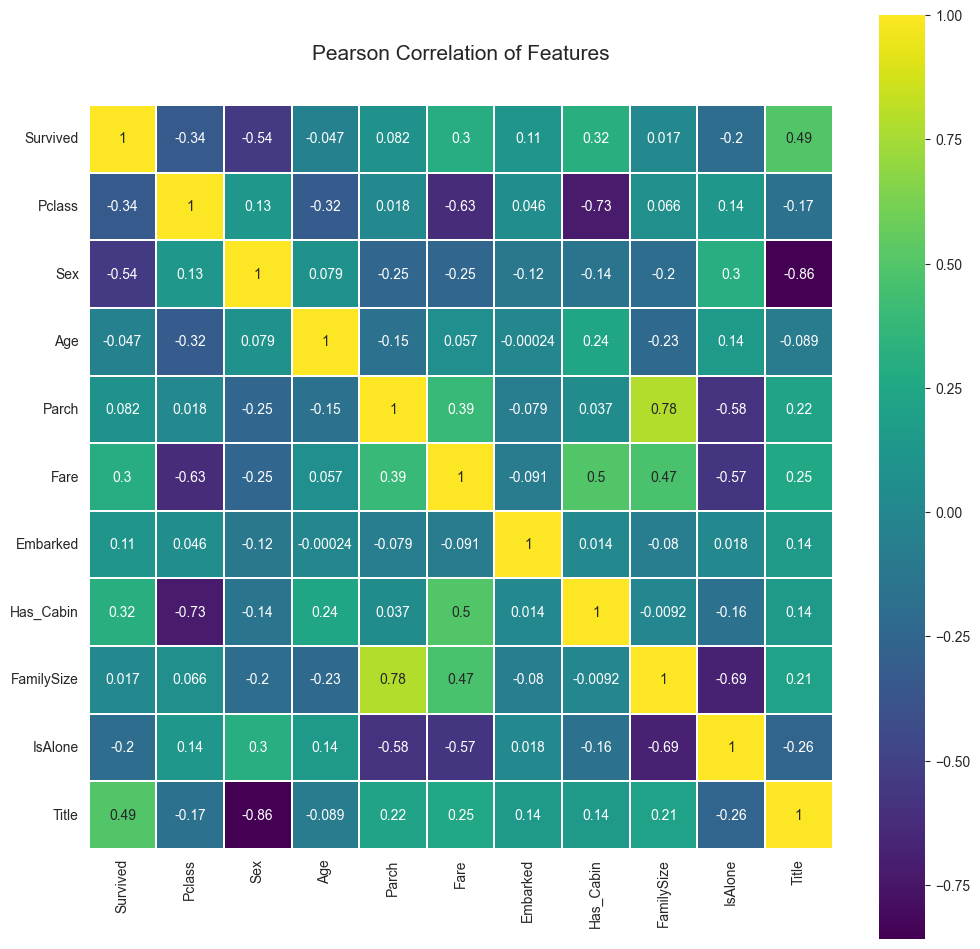

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
square=True, cmap=colormap, linecolor='white', annot=True)

## Komentarz

Zgodnie z tabelą, największa dodatnia korelacja z przetrwaniem występuje w przypadku zmiennej „Title” (tytuł), co sugeruje, że pasażerowie z tytułami (np. arystokracja lub inny wysoki status społeczny) mieli większe szanse na przeżycie. Zmienna „Sex” (płeć) ma silną ujemną korelację z przetrwaniem, co wskazuje na to, że kobiety miały znacznie większe szanse na przeżycie niż mężczyźni, co jest zgodne z zasadą "kobiety i dzieci pierwsze" stosowaną podczas ewakuacji.
Istnieje rowniez slaba ale zauważalna korelacja w cechach Pclass, Fare i Has_Cabin ale wszystkie te klasy mocno kojarzą sie ze statusem osoby posiadającej bilet.

TASK: Korzystając ze zbioru treningowego, wyznacz współczynnik przeżywalności dla każdego z pięciu różnych tytułów (cecha Title)

In [48]:
titles = {
    1: 'Mr',
    2: 'Master',
    3: 'Mrs',
    4: 'Miss',
    5: 'Rare'
}

In [49]:
grouping = train.groupby(by=['Title'])['Survived'].mean()
grouping.index = titles.values()

In [50]:
grouping

Mr        0.156673
Master    0.575000
Mrs       0.793651
Miss      0.702703
Rare      0.347826
Name: Survived, dtype: float64

## Komentarz

Najwyzsza przeżywalność miały kobiety (mężatki), według zasady najpierw 'kobiety i dzieci'. Statystycznie to właśnie one najbardziej wpisuja sie w to grono. Następnie reszta kobiet w tym prawdopobnie dziewcznyki. Wzglednie wysoki wspólczynnik przezywalności mieli również chłopcy (master). 
Najnizszą przeżywalności charakteryzowali sie dorośli mężczyźni.

TASK: Korzystając ze zbioru treningowego oraz walidacji krzyżowej (10-fold) wyznacznajlepszą głębokość drzewa decyzyjnego (kryterium podziału gini, albo entropy)

In [51]:
data_x = train.drop('Survived', axis=1)
data_y = train['Survived'] 

In [52]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(
    DecisionTreeClassifier(),
    {
        'criterion': ['gini'], 
        'max_depth': np.arange(1, 15)
    },
    cv=10,
    scoring='accuracy'
)

search.fit(data_x, data_y)
print(search.best_estimator_.max_depth)

3


TASK: Zbuduj drzewo decyzyjne wykorzystując z wyznaczonej wcześniej maksymalnej głębokości (kryterium podziału gini, lub entropy)

In [53]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 3,
criterion="entropy")
decision_tree.fit(data_x, data_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

TASK: Dokonaj predykcji możliwości przeżycia dla pasażerów ze zbioru testowego i zapisz wyniki w pliku

In [54]:
predictions = decision_tree.predict(test)

print("Predictions on the test sample:")
print(predictions)

Predictions on the test sample:
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 1]


TASK: Zwizualizuj drzewo decyzyjne.

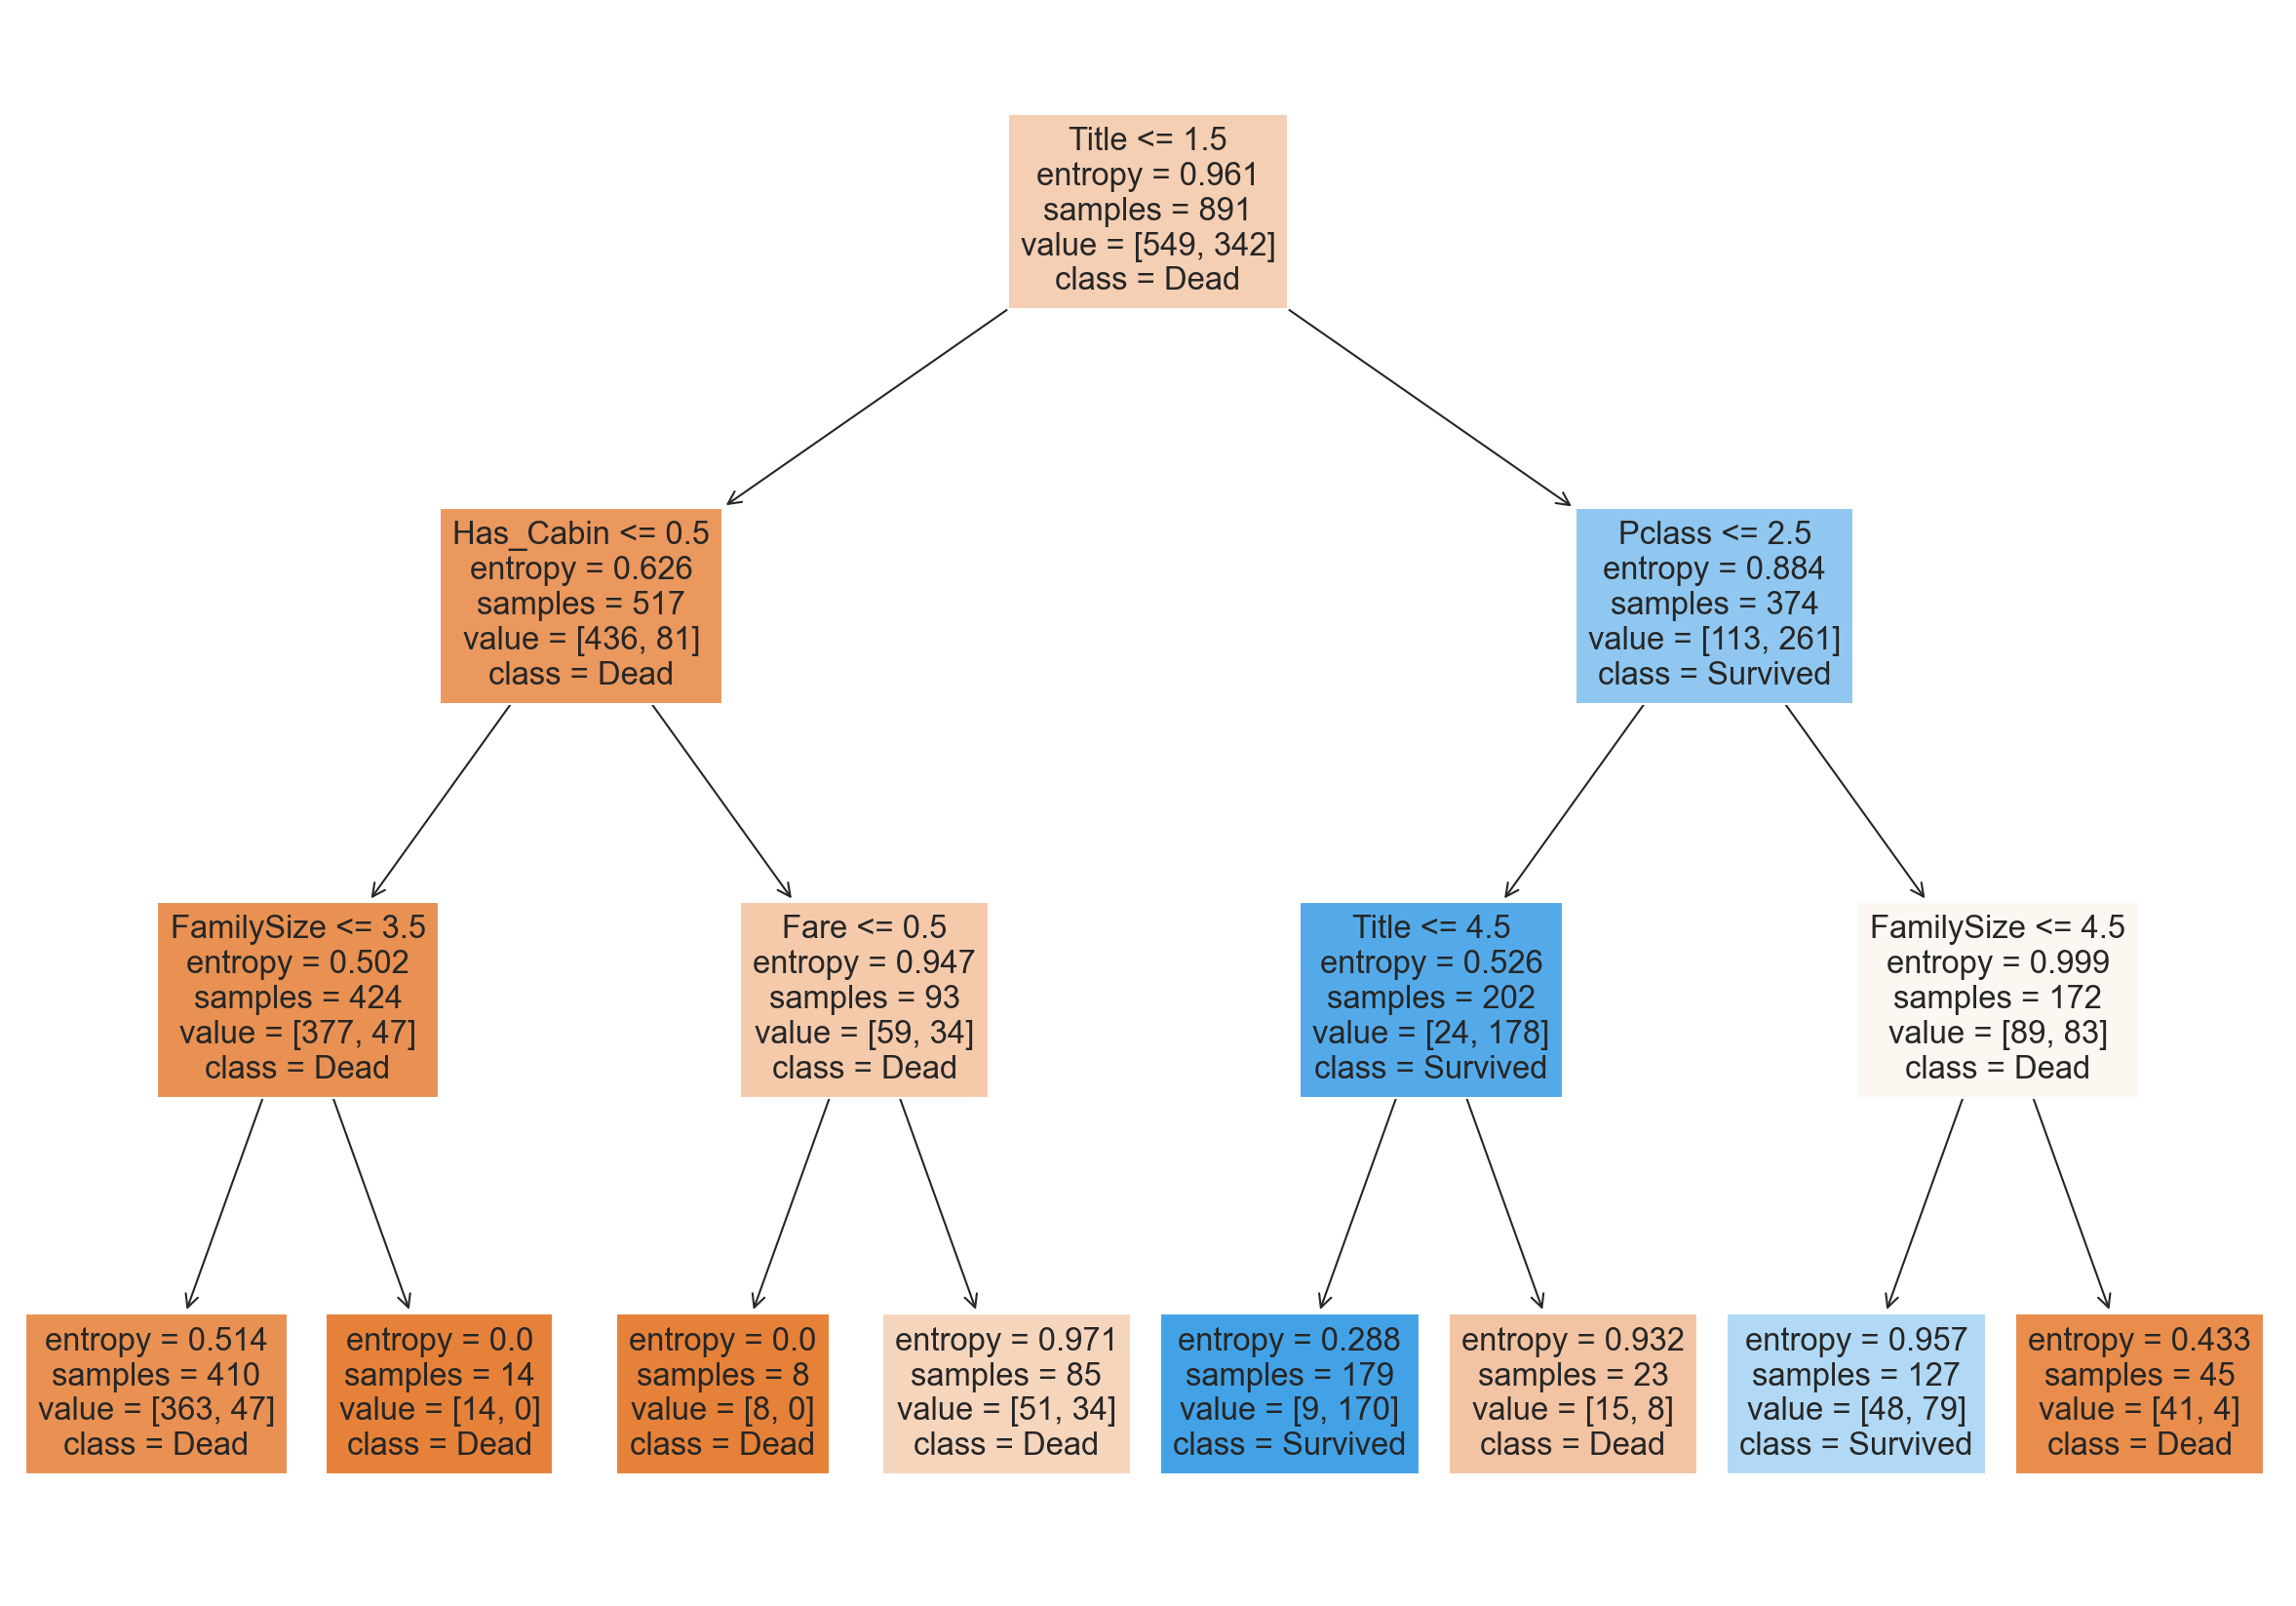

In [55]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 14))
plot_tree(decision_tree, feature_names=data_x.columns, class_names=['Dead', 'Survived'], filled=True)
plt.gcf().set_dpi(150)
plt.show()

## Komentarz

Tak jak z poprzednich wyników drzewo decyzyjne przedstawia, że tytuł, posiadanie kabiny, klasa biletu i rozmiar rodziny są głównymi predyktorami przeżywalności na Titaniku. Dorosli mężczyźni ("Mr"), pasażerowie bez kabin oraz ci z większymi rodzinami i niską opłatą za bilet mieli mniejsze szanse na przeżycie. Natomiast kobiety, pasażerowie z wyższymi klasami i mniejszymi rodzinami mieli lepsze perspektywy na ocalenie.

TASK: Sprawdź jak na dokładność klasyfikacji wpływają następujące parametery drzewa: kryterium podziału (gini vs. entropy), najmniejsza liczba rekordów w liściu oraz maksymalna głębokość drzewa

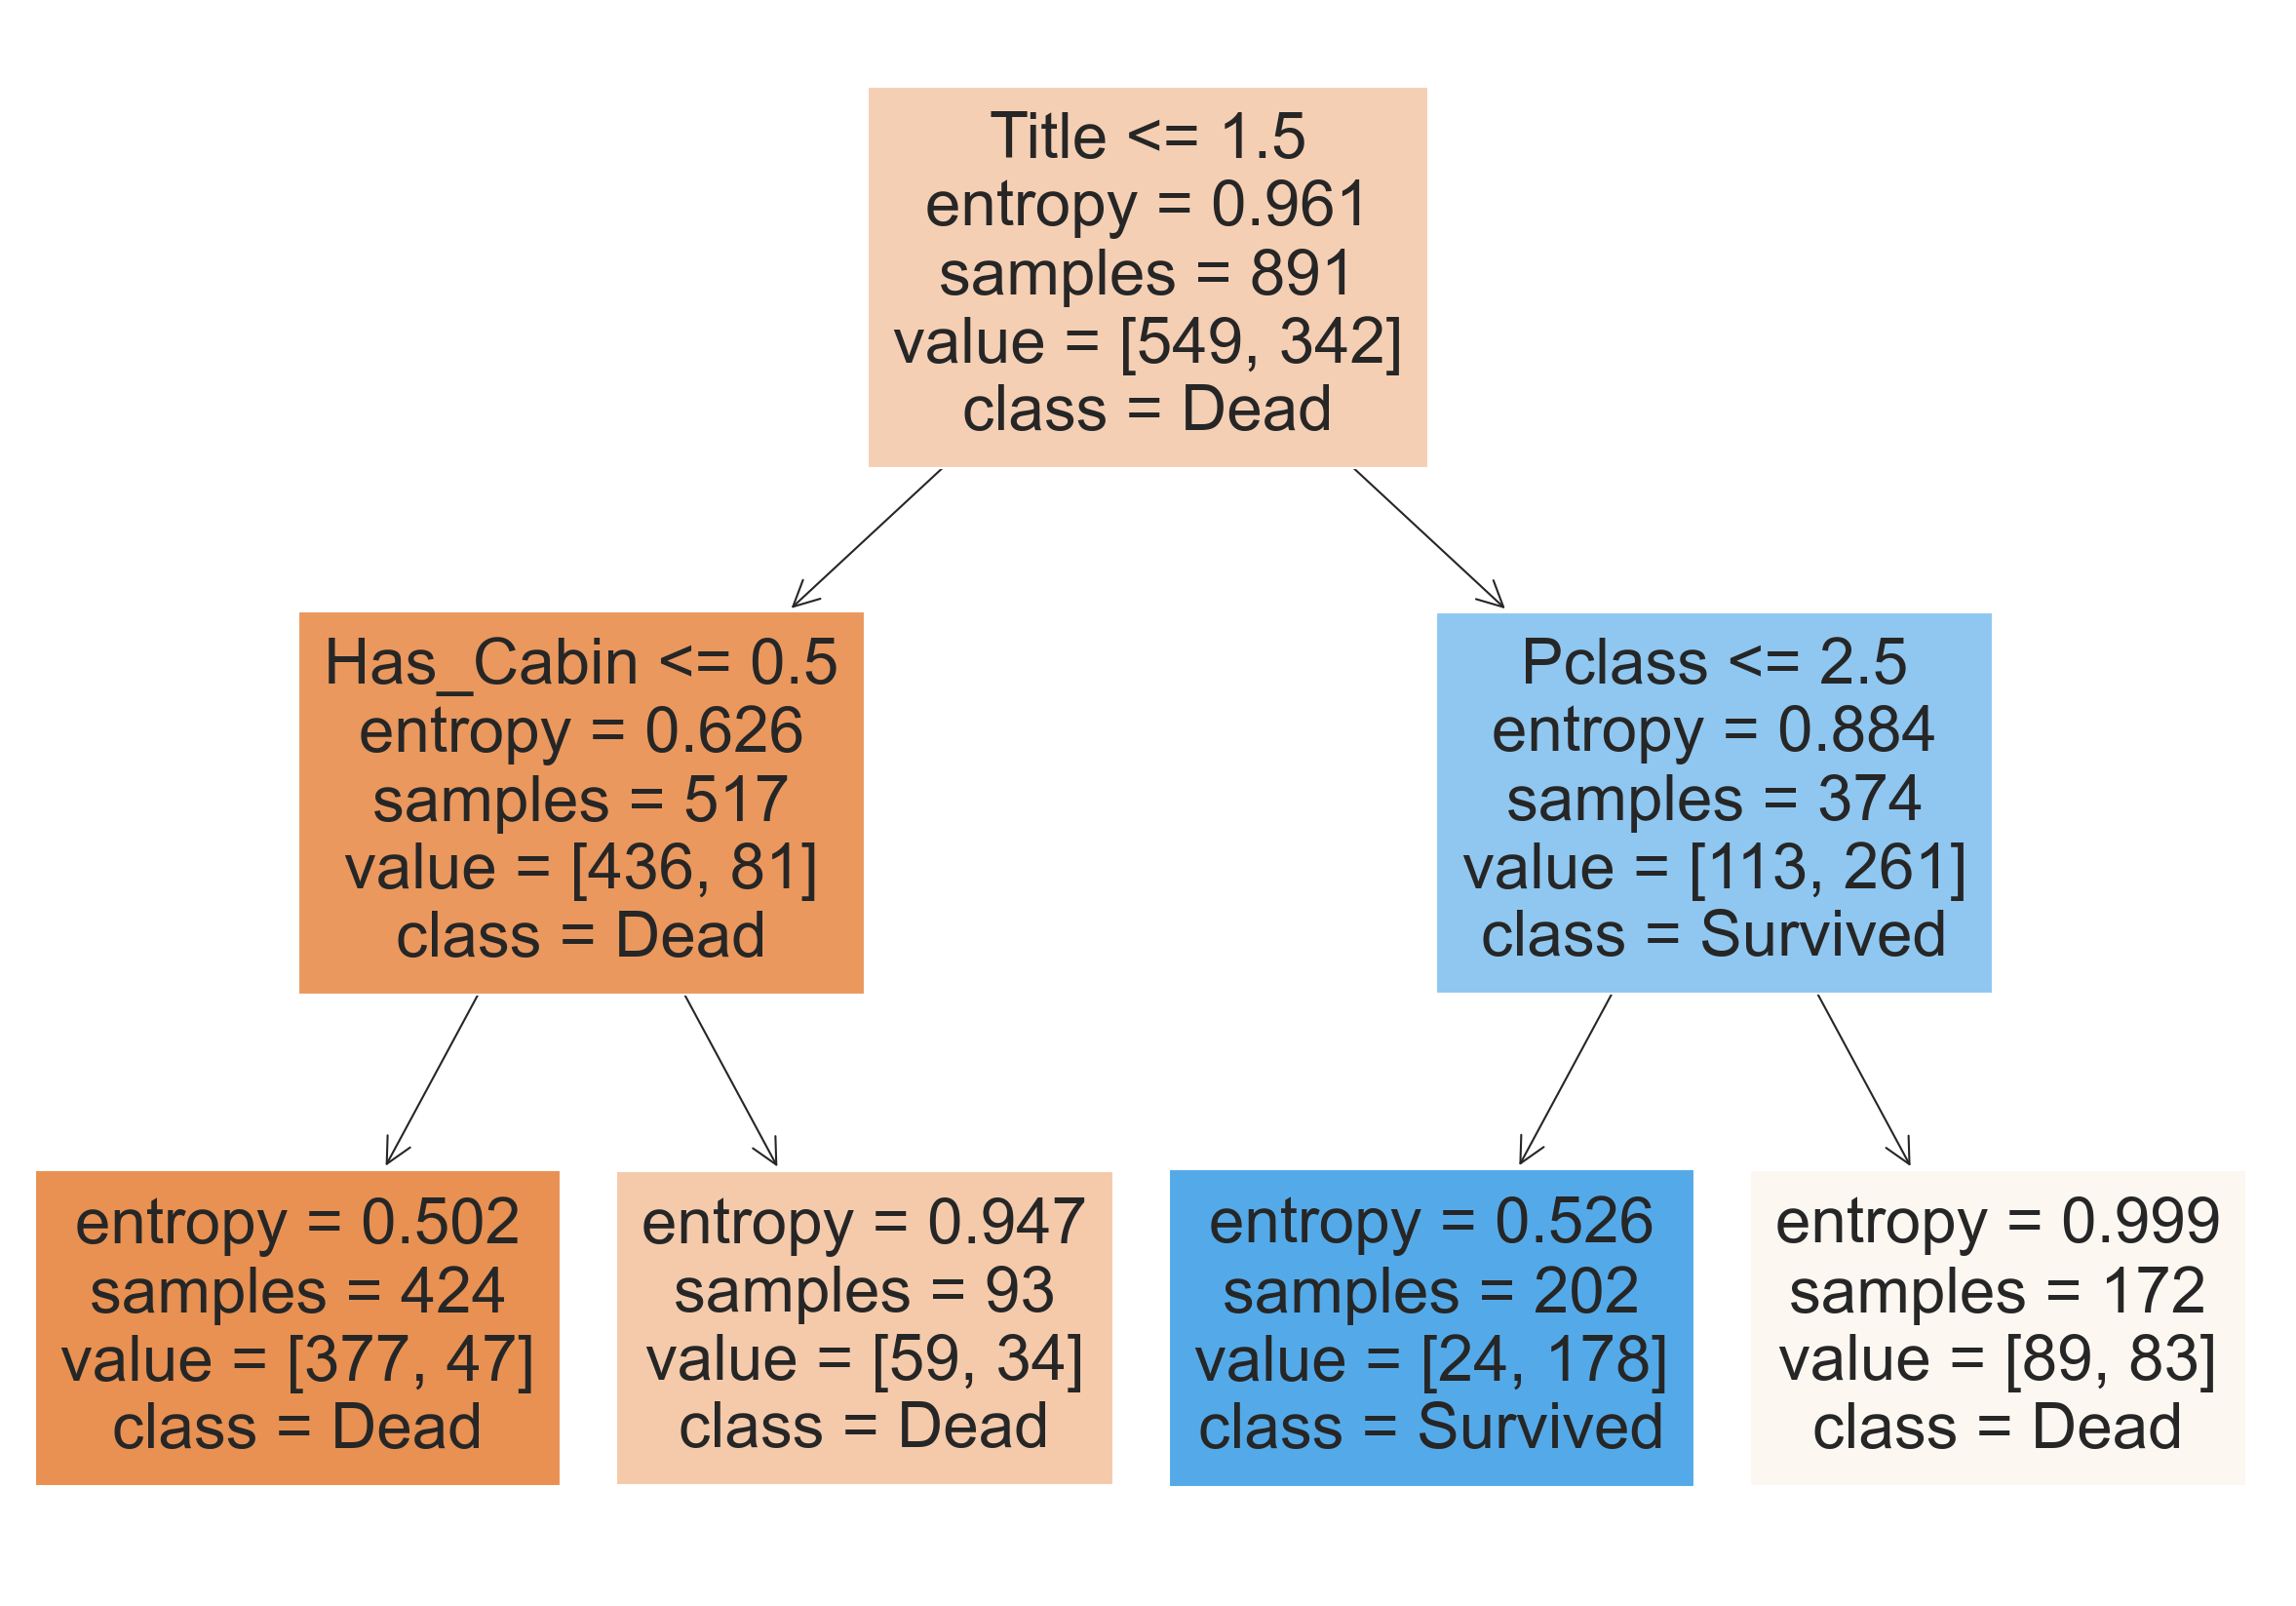

In [56]:
from sklearn import tree
decision_tree_entropy = tree.DecisionTreeClassifier(max_depth = 2, min_samples_leaf =3,
criterion="entropy")
decision_tree_entropy.fit(data_x, data_y)


plt.figure(figsize=(20, 14))
plot_tree(decision_tree_entropy, feature_names=data_x.columns, class_names=['Dead', 'Survived'], filled=True)
plt.gcf().set_dpi(150)
plt.show()

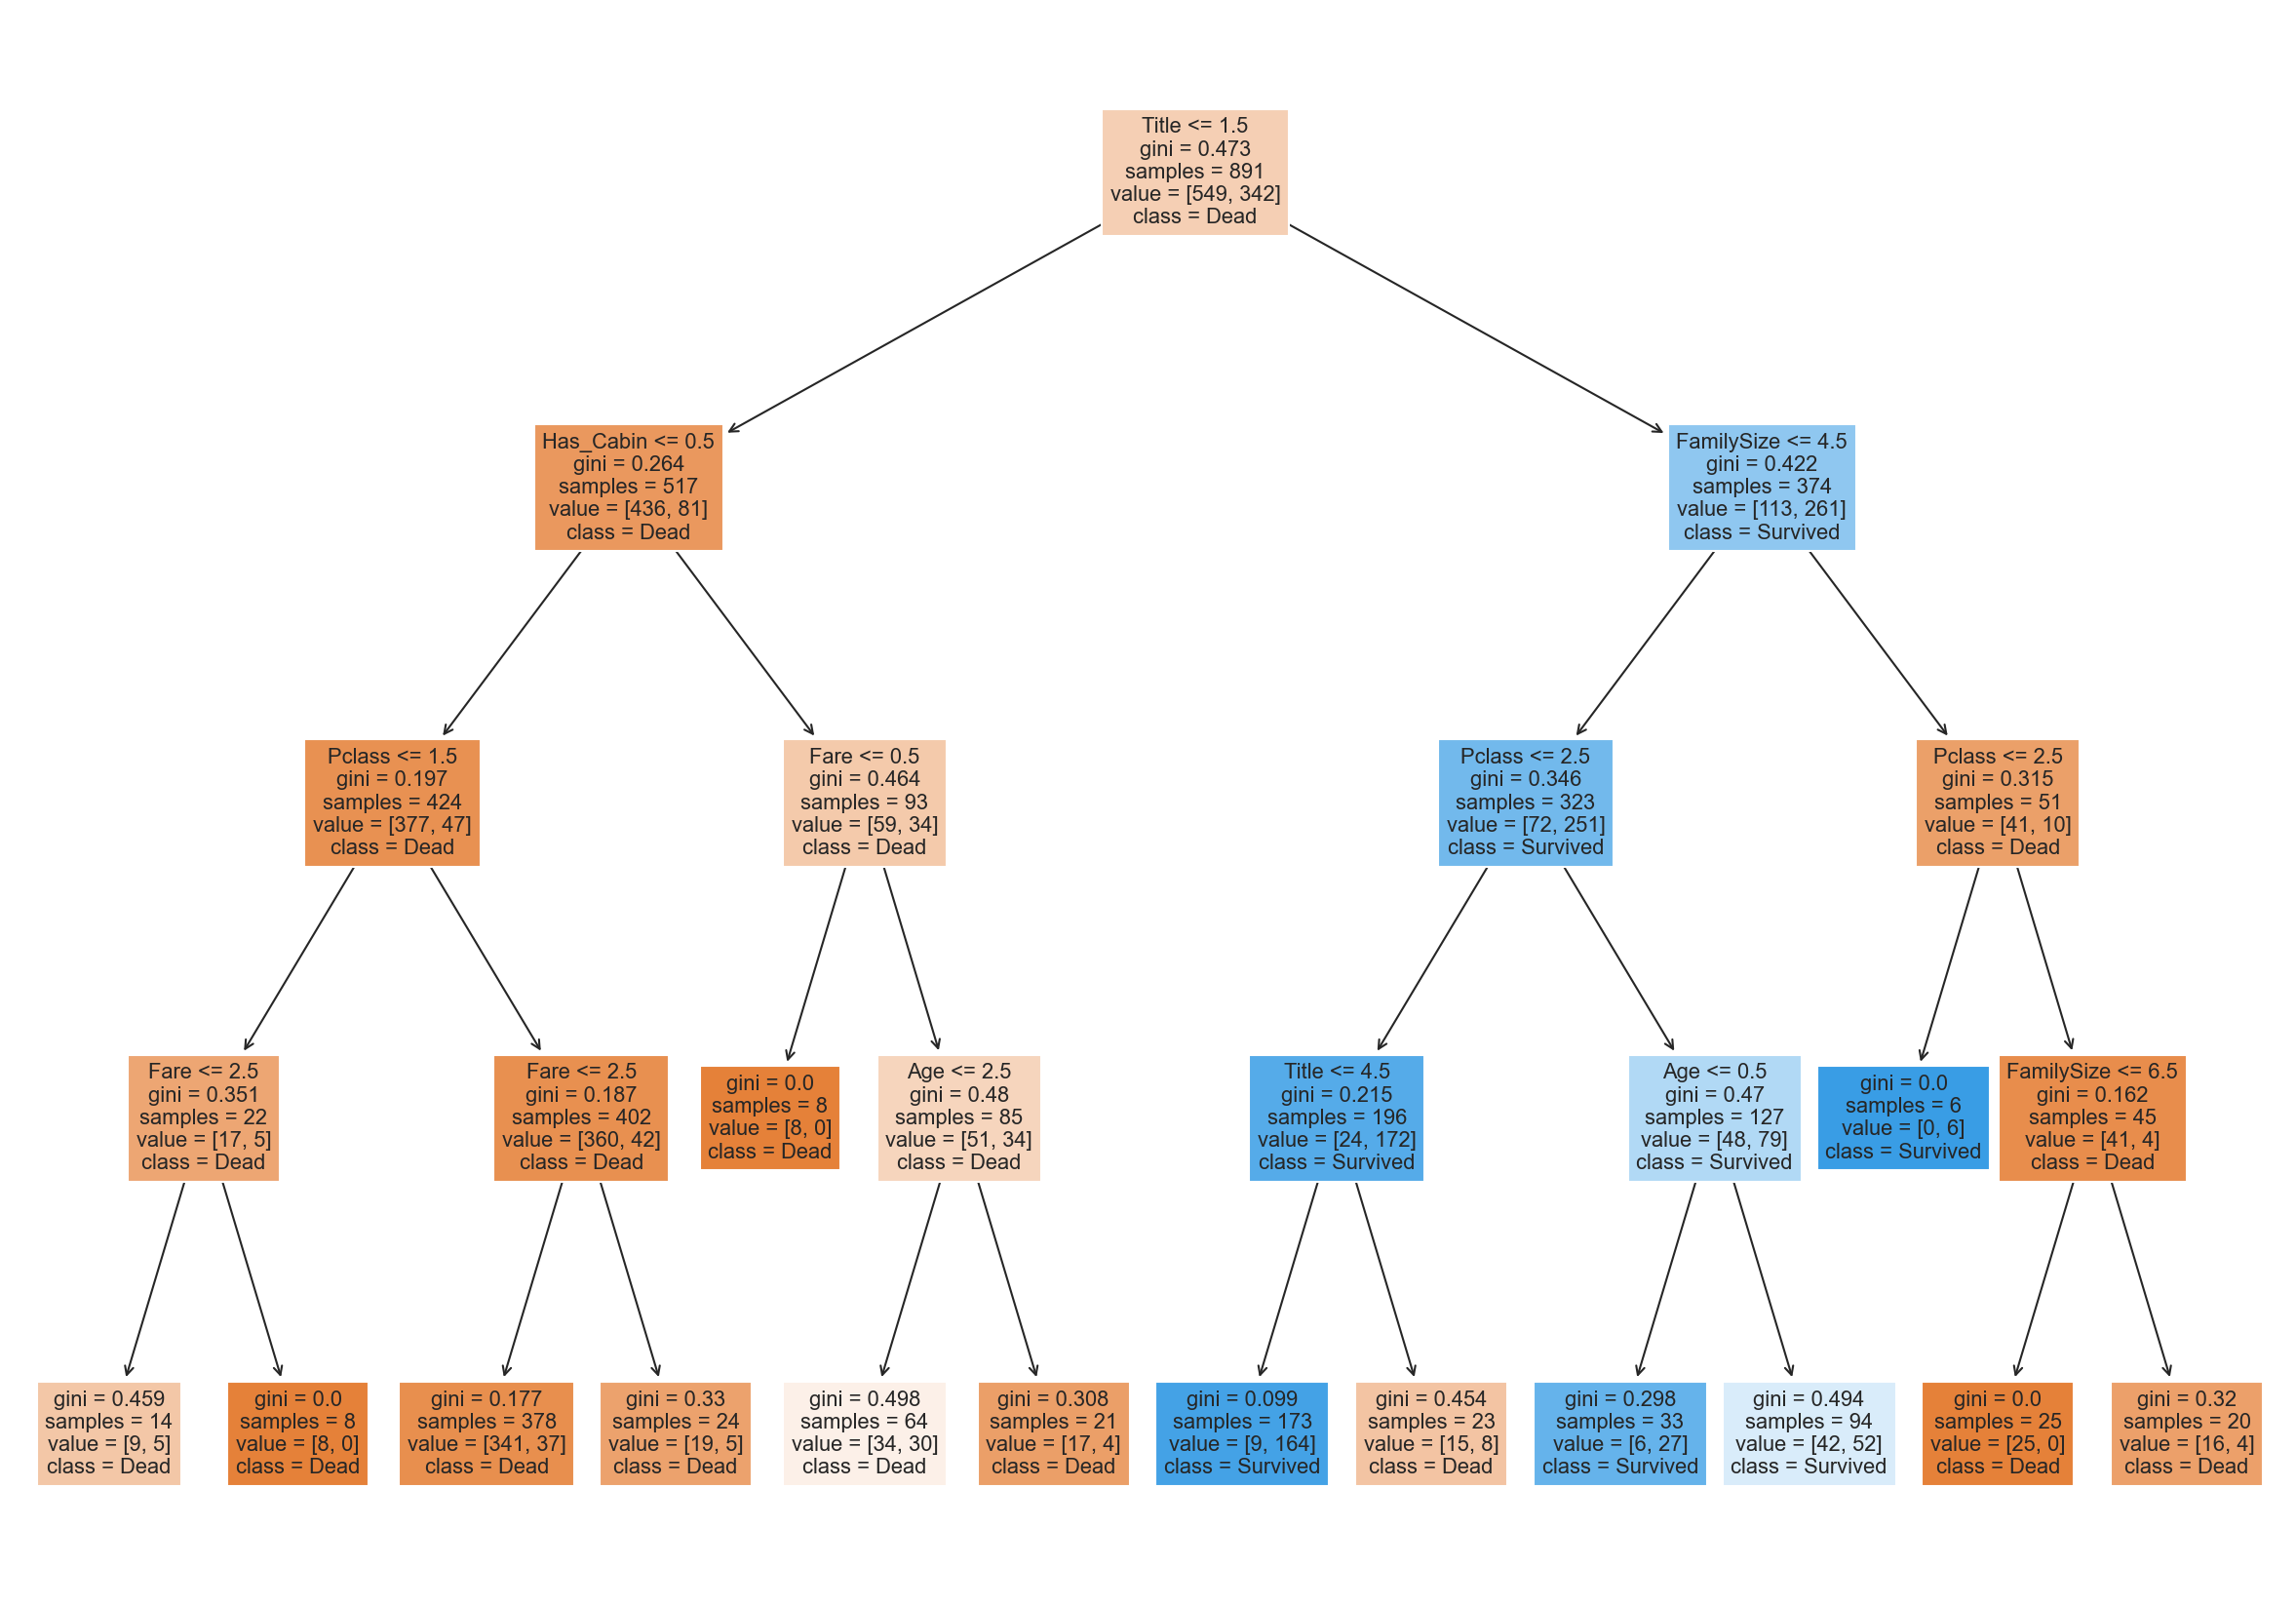

In [57]:
from sklearn import tree
decision_tree_gini = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5,
criterion="gini")
decision_tree_gini.fit(data_x, data_y)

plt.figure(figsize=(20, 14))
plot_tree(decision_tree_gini, feature_names=data_x.columns, class_names=['Dead', 'Survived'], filled=True)
plt.gcf().set_dpi(150)
plt.show()

## Komentarz

Głębokość drzewa wpływa na złożoność modelu: większa głębokość umożliwia tworzenie dokładniejszych dopasowań i niższych gałęzi. Głębokość drzewa jest również sposobem na ochronę przed przeuczeniem modelu.

Minimalna ilość liści kontroluje przeuczenie, ponieważ uniemożliwia tworzenie się zbyt szczegółowych reguł. Drzewo nie wygeneruje nowego podziału, jeśli w obu odgałęzieniach nie będzie wystarczającej liczby próbek, zgodnie z tym parametrem.

Kryterium podziału (entropia lub gini) określa sposób dokonywania podziału danych przez drzewo; entropia mierzy niepewność, a gini mierzy nieczystość węzłów. Oba kryteria dążą do optymalizacji podziałów, lecz różnią się logiką obliczania.

TASK: Podziel zbiór treningowy (dla którego mamy dostępne etykiety) na nowy zbiór treningowy (75%) i nowy zbiór testowy (25%)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=42)

TASK: Wyznacz i dokonaj wizualizacji macierzy rozbieżności confusion matrix (patrz Rysunek 3). Wykorzytaj w tym celu pomocniczą funkcję plot confusion matrix() dostępną w bibliotece SciKit Learn.

In [59]:
predictions = decision_tree_gini.predict(X_test)

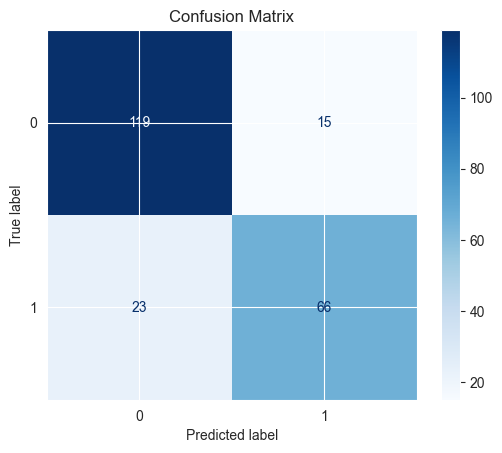

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Assuming 0 for Dead, 1 for Survived
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Komentarz

W macierzy pomyłek (confusion matrix) wartości w lewym górnym i prawym dolnym rogu (119 i 66) reprezentują poprawnie sklasyfikowane przypadki. Wartości w prawym górnym i lewym dolnym rogu (15 i 23) oznaczają błędne klasyfikacje.

Model poprawnie przewidział 119 przypadków, że pasażerowie nie przeżyli, oraz 66 przypadków, że przeżyli. 23 osoby, które przeżyły, zostały błędnie sklasyfikowane jako nieprzeżywające, a 15 osób, które nie przeżyły, zostało błędnie sklasyfikowanych jako przeżywające.


TASK: Wyznacz następujące miary jakości zbudowanego klasyfikatora.

In [61]:
from sklearn.metrics import accuracy_score, f1_score, average_precision_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", round(accuracy, 2))

f1 = f1_score(y_test, predictions)
print("F1-score:", round(f1, 2))

avg_precision_recall = average_precision_score(y_test, predictions)
print("Average Precision-Recall:", round(avg_precision_recall, 2))

Accuracy: 0.83
F1-score: 0.78
Average Precision-Recall: 0.71


Model prezentuje całkiem dobry poziom dokładności (Accuracy) na poziomie 0.83, co oznacza, że 83% przewidywań modelu jest poprawnych. 

F1-score wynosi 0.78, co wskazuje na dobrą równowagę między precyzją a czułością modelu, zwłaszcza gdy klasy są niezbalansowane. 

Średnia wartość Precision-Recall wynosząca 0.71 sugeruje, że model jest stosunkowo skuteczny w klasyfikacji prawdziwie pozytywnych przypadków w porównaniu do całkowitej liczby rzeczywistych pozytywów i fałszywie pozytywnych wyników.

# ZADANIE 2 - klasyfikator k-NN

Przetestuj działanie klasyfikatora najbliższego sąsiada na zbiorach danych:
Breast Cancer oraz NYT (wymiarowość zredukowana do 10 za pomocą
PCA):
— Wykorzystując dziesięciokrotną walidację krzyżową zmierz dokładność
klasyfikacji dla k = 1, k = 3, k = 5, k = 7.
— Zbadaj wpływ wprowadzenia wag odległości oraz innej miary odległości
(Euklidesowa vs. Taxi) na rezultaty klasyfikacji
— ⋆ Zaimplementuj i przetestuj algorytm KD-tree dla n wymiarów

In [62]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

In [63]:
# Breast Cancer Data Preparation
cancer_data = load_breast_cancer()
X_cancer = cancer_data.data
y_cancer = cancer_data.target

# Create a DataFrame with feature names
df_cancer = pd.DataFrame(X_cancer, columns=cancer_data.feature_names)
df_cancer['Target'] = y_cancer

In [64]:
# NYT Data Preparation
nyt_data = pd.read_csv('nyt-frame.csv')
X_nyt = nyt_data.iloc[:, :-1]
y_nyt = nyt_data.iloc[:, -1].astype(int)

In [65]:
scaler = StandardScaler()
pca = PCA(n_components=10)

ks = [1, 3, 5, 7]
scores = {}
weights = ['uniform', 'distance']
metrics = ['euclidean', 'manhattan']

In [66]:
def prepare_data(X, encode=False):
    
    if encode:
        categorical_cols = X.columns[X.dtypes == 'object']
        transformers = [
            ('cat', OneHotEncoder(), categorical_cols),
            ('num', StandardScaler(), X.columns.difference(categorical_cols))
        ]
        preprocessor = ColumnTransformer(transformers, remainder='passthrough')
        X_transformed = preprocessor.fit_transform(X)
        
    else:
        scaler = StandardScaler()
        X_transformed = scaler.fit_transform(X)
        
    X_pca = pca.fit_transform(X_transformed)
    
    return X_pca

In [67]:
X_cancer_pca = prepare_data(X_cancer)
X_nyt_pca = prepare_data(X_nyt, encode=True)

In [68]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Dataset", "Neighbors", "Weight", "Metric", "Accuracy"]

In [69]:
# To show all scores - over 120 rows.

# for dataset, X_pca, y in [("Breast Cancer", X_cancer_pca, y_cancer), ("NYT", X_nyt_pca, y_nyt)]:
#     for weight in weights:
#         for metric in metrics:
#             for k in ks:
#                 knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
#                 score = cross_val_score(knn, X_pca, y, cv=10, scoring='accuracy').mean()
#                 table.add_row([dataset, f'k={k}', weight, metric, f"{score:.4f}"])


In [70]:
# Choosing only best scores for each dataset

best_scores = {}

for dataset, X_pca, y in [("Breast Cancer", X_cancer_pca, y_cancer), ("NYT", X_nyt_pca, y_nyt)]:
    best_score = 0
    best_config = None
    for weight in weights:
        for metric in metrics:
            for k in ks:
                knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
                score = cross_val_score(knn, X_pca, y, cv=10, scoring='accuracy').mean()
                if score > best_score:
                    best_score = score
                    best_config = (dataset, f'k={k}', weight, metric, f"{score:.4f}")
    if best_config:
        table.add_row(best_config)

In [71]:
print(table)

+---------------+-----------+---------+-----------+----------+
|    Dataset    | Neighbors |  Weight |   Metric  | Accuracy |
+---------------+-----------+---------+-----------+----------+
| Breast Cancer |    k=7    | uniform | euclidean |  0.9701  |
|      NYT      |    k=1    | uniform | euclidean |  1.0000  |
+---------------+-----------+---------+-----------+----------+


## Komenatrz

Zbiór danych: Breast Cancer
* Najlepsza konfiguracja: k=7, wagi równomierne, metryka Euklidesowa.
* Dokładność: 97.01%.

Zbiór danych: NYT
* Najlepsza konfiguracja: k=1, wagi równomierne, metryka Euklidesowa.
* Dokładność: 100.00%.

TASK: Zaimplementuj i przetestuj algorytm KD-tree dla n wymiarów.

In [72]:
from sklearn.neighbors import KDTree


def kd_tree_classify(X_train, y_train, X_test, k, metric='euclidean'):
    tree = KDTree(X_train, metric=metric)
    
    # Znajdowanie k najbliższych sąsiadów dla każdego punktu w zbiorze testowym
    dist, ind = tree.query(X_test, k=k)
    
    # Przewidywanie klasy przez głosowanie większościowe
    if k == 1:
        # Bezpośrednie przypisanie klasy dla k=1
        predictions = y_train[ind].flatten()
    else:
        # Głosowanie większościowe dla k > 1
        predictions = np.array([np.argmax(np.bincount(y_train[indices])) for indices in ind])
    
    return predictions

In [73]:
def evaluate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [74]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer_pca, y_cancer, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7]
metric = 'euclidean'

In [75]:
results_kd_tree = {}

# Testowanie KD-tree na zbiorze Breast Cancer
for k in k_values:
    y_pred_cancer = kd_tree_classify(X_train_cancer, y_train_cancer, X_test_cancer, k, metric)
    accuracy_cancer = evaluate_accuracy(y_test_cancer, y_pred_cancer)
    results_kd_tree[f'Breast Cancer, k={k}'] = accuracy_cancer

# Wyświetlanie wyników
for description, accuracy in results_kd_tree.items():
    print(f"{description}: {accuracy:.4f}")

Breast Cancer, k=1: 0.9386
Breast Cancer, k=3: 0.9474
Breast Cancer, k=5: 0.9561
Breast Cancer, k=7: 0.9561


# Komentarz

Wyniki klasyfikacji zbioru Breast Cancer za pomocą algorytmu k-najbliższych sąsiadów wskazują na wzrost dokładności w miarę zwiększania liczby sąsiadów  k od 1 do 5, stabilizując się na poziomie 95.61% przy k=5 i k=7. Stabilizacja dokładności przy większych k sugeruje, że dodatkowe sąsiedztwo nie wprowadza już znaczącej poprawy, co może wskazywać na optymalną liczbę sąsiadów dla tego zbioru danych.

# ZADANIE 3: RANDOM FOREST.

1. Sprawdź czy zastosowanie wielu nieskorelowanych drzew decyzyjnych (las losowy) może poprawić wyniki klasyfikacji uzyskane w punktach: 5.8, 5.9, 5.10.
2. Przetestuj dokładność klasyfikacji uzyskiwaną za pomocą klasyfikatora RandomForest na zbiorze Breast Cancer (rezultaty dzięsięciokrotnej walidacji krzyżowej). Jakie wartości parametrów modelu dają najlepsze wyniki? Czy użycie PCA wpływa znacząco na osiągnięte wyniki?

Poprzednie wyniki:

Accuracy: 0.83
F1-score: 0.78
Average Precision-Recall: 0.71

In [76]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)

In [77]:
random_forest = RandomForestClassifier(n_estimators=500, max_depth=3, criterion="entropy", random_state=42)
random_forest.fit(data_x, data_y)
predictions_rf = random_forest.predict(X_test)

In [78]:
accuracy_rf = accuracy_score(y_test, predictions_rf)
f1_rf = f1_score(y_test, predictions_rf)
avg_precision_recall_rf = average_precision_score(y_test, predictions_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}, F1-score: {f1_rf:.2f}, Avg Precision-Recall: {avg_precision_recall_rf:.2f}")

Random Forest Accuracy: 0.83, F1-score: 0.79, Avg Precision-Recall: 0.73


Przy BRAKU zastosowaniu hiperparametryzacji wyniki są dość zbliżone do wyników drzewa decyzyjnego.

TASK: Przetestuj dokładność klasyfikacji uzyskiwaną za pomocą klasyfikatora RandomForest na zbiorze Breast Cancer (rezultaty dzięsięciokrotnej walidacji krzyżowej). Jakie wartości parametrów modelu dają najlepsze wyniki? Czy użycie PCA wpływa znacząco na osiągnięte wyniki?

In [79]:
from sklearn.pipeline import Pipeline

data = load_breast_cancer()
X = data.data
y = data.target

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [82]:
rf = RandomForestClassifier(random_state=42)

In [83]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [91]:
best_rf = grid_search_rf.best_estimator_
print("Best parameters (No PCA):", grid_search_rf.best_params_)
print("Best accuracy (No PCA):", grid_search_rf.best_score_)

# Ocena na zbiorze testowym
predictions_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f"Test Accuracy (No PCA): {accuracy_rf:.2f}")

Best parameters (No PCA): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy (No PCA): 0.9572468354430379
Test Accuracy (No PCA): 0.97


In [92]:
param_grid_pca = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4],
    'pca__n_components': [5, 10, 15, 30]
}

In [93]:
pipeline = Pipeline([
    ('pca', PCA(n_components=10)),
    ('random_forest', RandomForestClassifier(random_state=42))
])

In [ ]:
grid_search_pca = GridSearchCV(pipeline, param_grid=param_grid_pca, cv=5, scoring='accuracy')
grid_search_pca.fit(X_train, y_train)

In [ ]:
best_pca = grid_search_pca.best_estimator_
print("Best parameters (With PCA):", grid_search_pca.best_params_)
print("Best accuracy (With PCA):", grid_search_pca.best_score_)

# Ocena na zbiorze testowym
predictions_pca = best_pca.predict(X_test)
accuracy_pca = accuracy_score(y_test, predictions_pca)
print(f"Test Accuracy (With PCA): {accuracy_pca:.2f}")